In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Función de simulación Euler-Maruyama
# ------------------------------
def simulate_path(r, sigma, N0, dt, n):
    N = np.zeros(n)
    N[0] = N0
    for i in range(1, n):
        dW = np.sqrt(dt) * np.random.randn()
        N[i] = N[i-1] + r*N[i-1]*dt + sigma*N[i-1]*dW
        if N[i] < 0:
            N[i] = 0
    return N

In [5]:
# ================================
# Experimento 1: Trayectorias individuales
# ================================
def experiment1(r=0.2, N0=100, T=20, dt=0.001, sigmas=[0.05, 0.2, 0.5], num_traj=20):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    plt.figure(figsize=(14, 8))
    for idx, sigma in enumerate(sigmas):
        plt.subplot(1, len(sigmas), idx+1)
        for _ in range(num_traj):
            N = simulate_path(r, sigma, N0, dt, n)
            plt.plot(t, N, alpha=0.5)
        plt.title(f"σ = {sigma}")
        plt.xlabel("Tiempo")
        if idx == 0:
            plt.ylabel("Población")
        plt.grid(alpha=0.3)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('experiment1.png', dpi=900, bbox_inches='tight')
    plt.show()


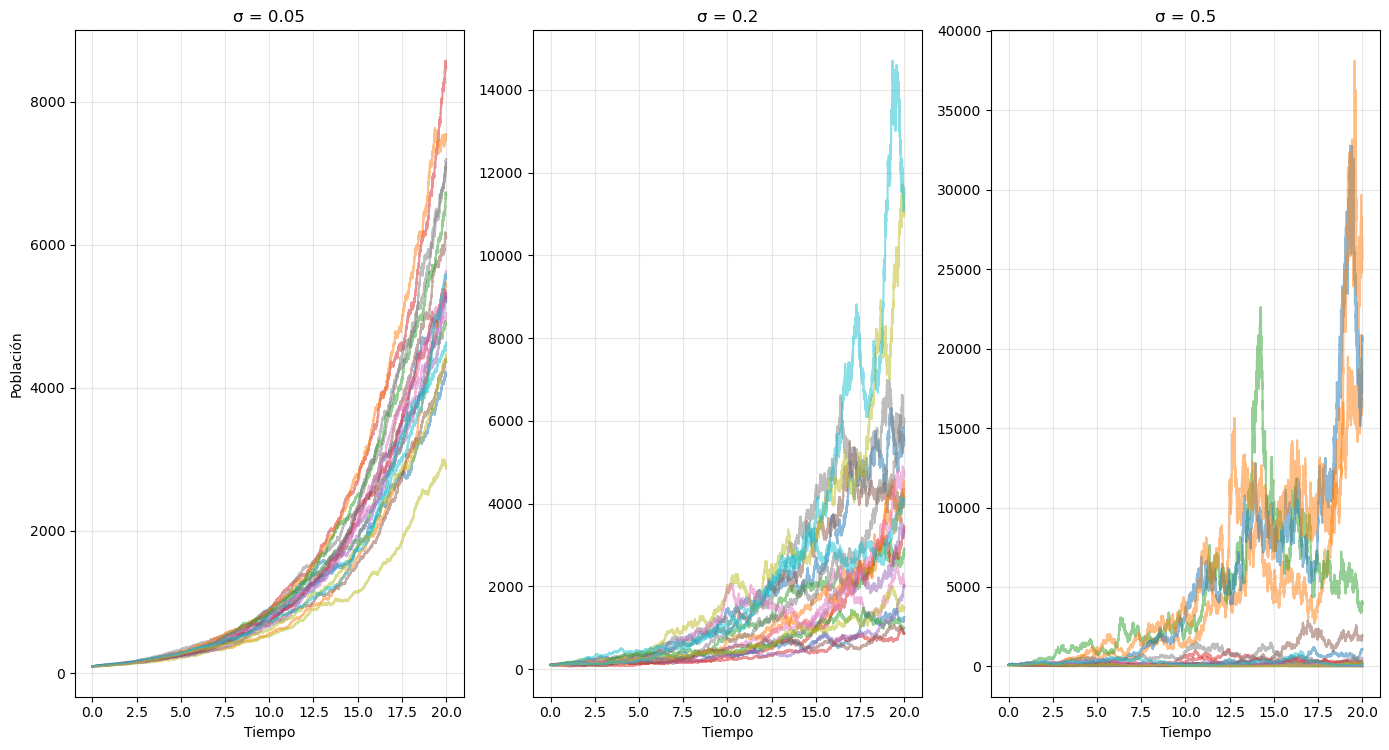

In [6]:
experiment1()

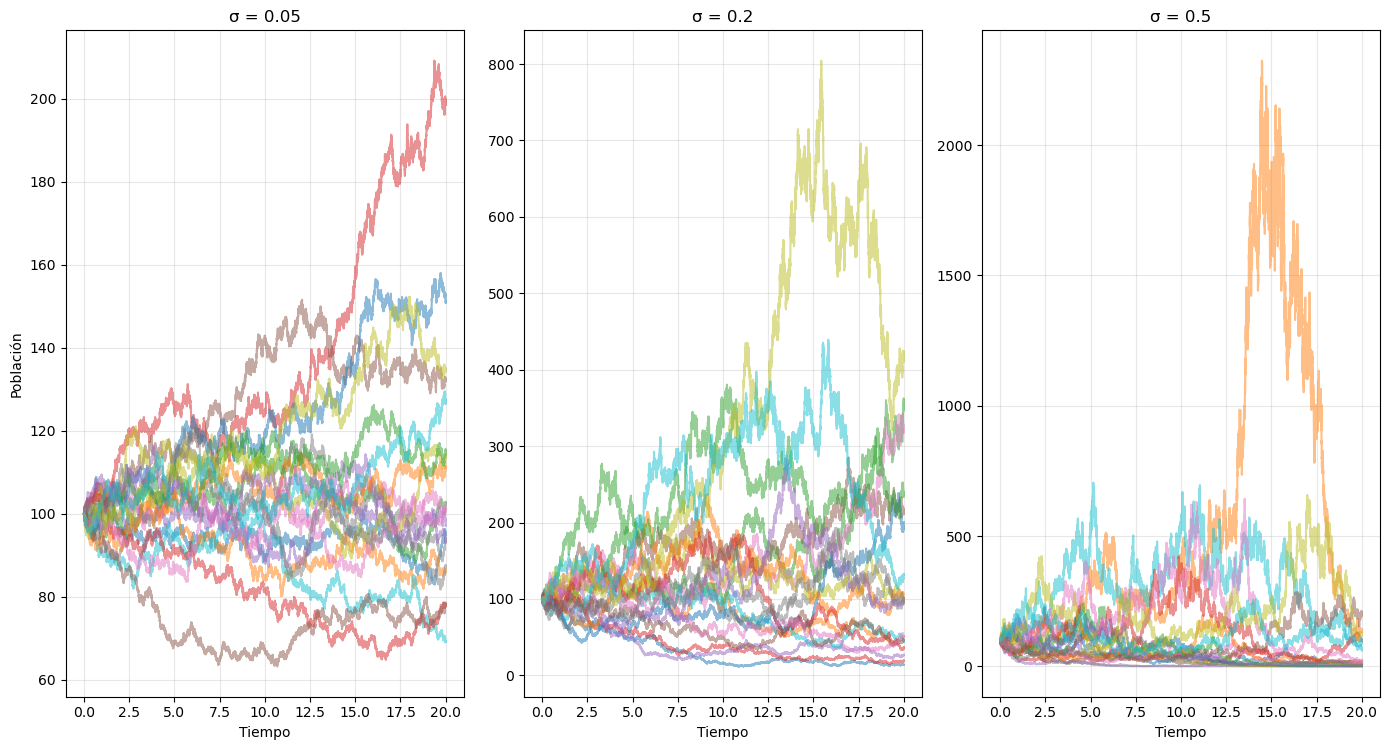

In [8]:
experiment1(r=-0)

In [6]:
# ================================
# Experimento 2: Media y mediana de muchas trayectorias
# ================================
def experiment2(r=0.2, N0=100, T=20, dt=0.001, sigma=0.2, num_runs=2000):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    data = np.zeros((num_runs, n))
    for k in range(num_runs):
        data[k] = simulate_path(r, sigma, N0, dt, n)
    
    mean_N = np.mean(data, axis=0)
    median_N = np.median(data, axis=0)
    deterministic = N0 * np.exp(r * t)
    
    plt.figure(figsize=(12, 7))
    plt.plot(t, mean_N, label="Media", linewidth=2)
    plt.plot(t, median_N, label="Mediana", linewidth=2)
    plt.plot(t, deterministic, 'k--', label="Solución determinista")
    plt.xlabel("Tiempo")
    plt.ylabel("Población")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


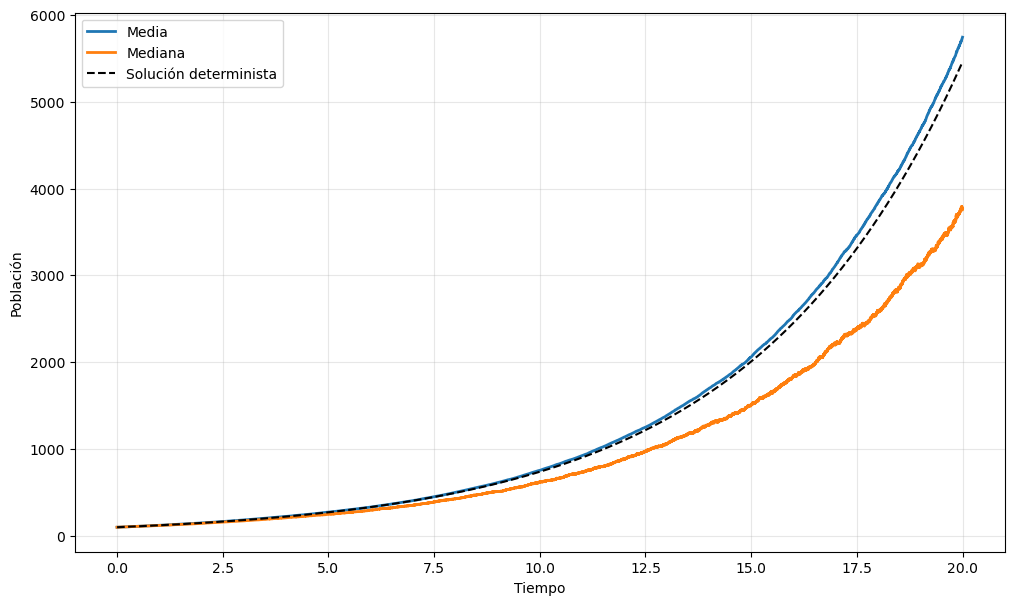

In [7]:
experiment2()

In [6]:
# ================================
# Experimento 3: Distribución final N(T)
# ================================
def experiment3(r=0.2, N0=100, T=20, dt=0.001, sigmas=[0.1, 0.4], num_runs=5000):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    plt.figure(figsize=(12, 5))
    for idx, sigma in enumerate(sigmas):
        final_values = []
        for k in range(num_runs):
            N = simulate_path(r, sigma, N0, dt, n)
            final_values.append(N[-1])
        plt.subplot(1, len(sigmas), idx+1)
        plt.hist(final_values, bins=80, density=True, alpha=0.7)
        plt.title(f"Distribución de N(T) para σ = {sigma}")
        plt.xlabel("Valor final N(T)")
        plt.ylabel("Densidad")
        plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


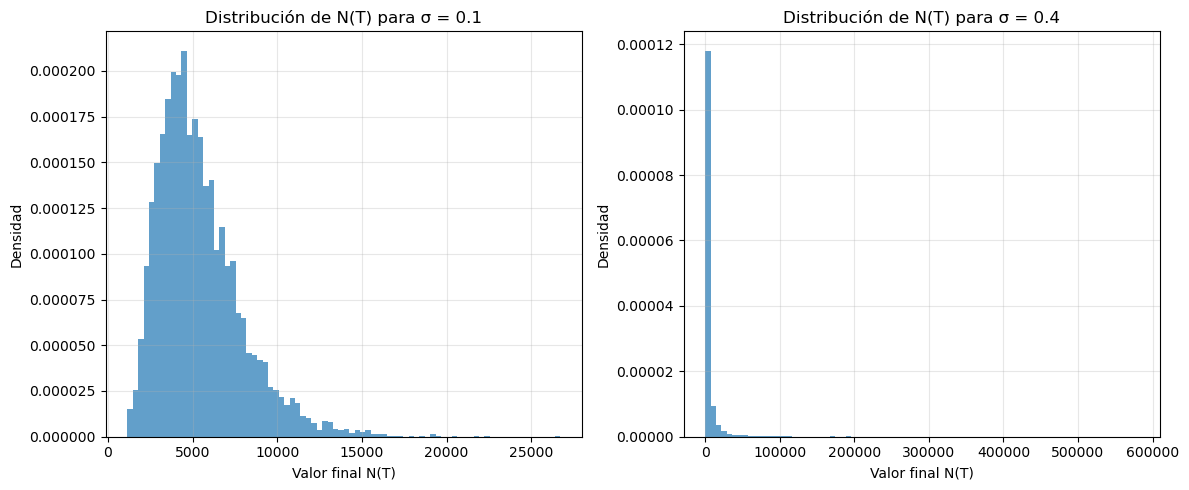

In [7]:
experiment3()